NetID: leahnl2

Assignment: Lab 1

Grade: _ / _

Comment:

# CS448 - Lab 1: Forward and Inverse STFT

The purpose of this lab is to familiarize you with taking a sound to the time/frequency domain and back. You will code a spectrogram routine, its inverse, and then run some examples to see the effects of various parameters when performing such analyses. Although you can find existing functions to perform some of these calculations, you will have to develop your own version from scratch. This will allow you to perform some more complex processing later in the semester, and of course it will also give you a deeper understanding of how things work.

You will likely reuse a lot of this code in future labs, so this is not one of the labs to skip!

## Part 1. The Forward Transform

You need to design a function that uses five different arguments as follows:
```
	stft_output = stft( input_sound, dft_size, hop_size, window)
		input_sound is a 1d array that contains an input sound.
		dft_size is the DFT point size that you will use for this analysis.
		hop_size is the number of samples that your analysis frame will advance.
		window is a vector containing the analysis window that you will be using.
```

To complete this you need to perform the following steps:

- You need to segment the input array as shorter frames which are ```dft_size``` samples long. Each frame will start ```hop_size``` samples after the beginning of the previous one. In practice, ```hop_size``` will be smaller than ```dft_size```, usually by a factor of 2 or 4. Feel free to add some zeros at the beginning and/or end of the input so that you have enough samples to compose the last frame at the desired length.

- You will then need to compute the Discrete Fourier Transform (DFT) of each frame. For each input frame you will get a complex-valued vector containing its spectrum. Take all of these vectors and concatenate them as columns of a matrix. The ```{i,j}``` element of this matrix will contain the coefficient for frequency ```i``` at input frame ```j```. Note that there is a variety of Fourier options in numpy. Since we will be using real-valued signals you should use the ```fft.rfft``` routine.

- You might notice that by doing only the above the output is a little noisy-looking. This is because we are not using an analysis window. In order to apply a window, before you apply the DFT routine, you need to multiply each analysis frame with a function that smoothly tapers the edges down to zero. This function will be provided as the function input ```window```, which will have to have the same length as the analysis frames (i.e. ```dft_size``` samples). Typical window shapes are the triangle window (goes from 0 to 1 to 0), the Hann window (see the incorrectly-named function ```hanning```), the Hamming window (```hamming```), and the Kaiser window (```kaiser```).

You should now have a complete forward Short-Time Fourier Transform routine.  Try it on the following example sounds:

- Drum clip: [ https://drive.google.com/uc?export=download&id=1e-pLopbM4WyOFadoxu78E77EvXX4OtYb ]
- Speech clip: [ https://drive.google.com/uc?export=download&id=1dlOQHVi5po7S2CwIWvBsZMJpL17mbFgx ]
- Piano clip: [ https://drive.google.com/uc?export=download&id=1eEFfri_af_QXN4k7xQS2bntyS4VzHLsv ]

and plot the magnitude of the result (you should use the ```pcolormesh``` function to plot it as an image). Try to find the best function parameters that allow you to see what’s going on in the input sounds. You want to get a feel of what it means to change the DFT size, the hop size, and the window. Plot some results that demonstrate the effect of these parameters.  As a rough guide, traditionally the hop size is 1/2, 1/4 or 1/8, of the DFT size, and historically the DFT size is almost always chosen to be a power of two (it's faster than otherwise).

Often, such plots lack significant contrast to make a good visualization. A good idea is to plot the log value of the magnitudes (beware of zeros), or to raise them to a small power, e.g. 0.3. This will create better looking plots where smaller differences are more visible. A good colormap is also essential, have a look at: [ https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/ ] You want to use something with a linear luminance gradient.

Finally, I want you to make sure that the axes in your spectrogram plot are in terms of Hz on the y-axis and seconds on the x-axis.  We will ruthlessly cut points if you don't do this (for the rest of the semester too, all plots need to be properly labeled).

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import utils

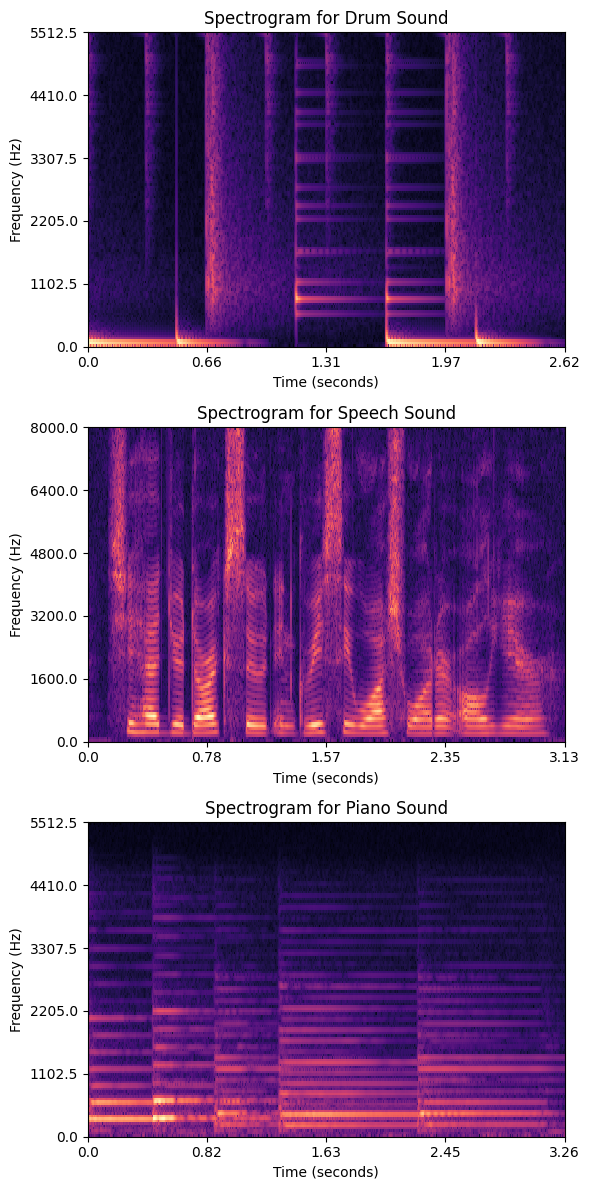

In [23]:
def stft(input_sound, dft_size, hop_size, window):
    # YOUR CODE HERE

    # get windowed segments of input sound and compute DFT of each
    spectrogram = []
    n = len(input_sound)

    for i in range(0, n - dft_size - 1, hop_size):
        #  get frame, padding with zeros if necessary
        frame = []
        if i + dft_size < n:
            frame = input_sound[i:i+dft_size]
        else:
            frame = np.append(input_sound[i:n], np.zeros((i + dft_size) - n))

        # compute DFT
        frame_dft = np.fft.rfft(frame * window)

        # append to spectrogram array
        spectrogram.append(frame_dft) # append as rows

    # Return a complex-valued spectrogram (frequencies x time)
    return np.array(spectrogram).T

# Load each sound
# YOUR CODE HERE
drum_sr, drum_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1e-pLopbM4WyOFadoxu78E77EvXX4OtYb")
speech_sr, speech_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1dlOQHVi5po7S2CwIWvBsZMJpL17mbFgx")
piano_sr, piano_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1eEFfri_af_QXN4k7xQS2bntyS4VzHLsv")

# STFT them
# YOUR CODE HERE
dft_size = 256
hop_size = dft_size // 4
hann_window = np.hanning(dft_size)

drum_spectrogram = stft(drum_x, dft_size, hop_size, hann_window)
speech_spectrogram = stft(speech_x, dft_size, hop_size, hann_window)
piano_spectrogram = stft(piano_x, dft_size, hop_size, hann_window)

# Plot all the spectrograms
# YOUR CODE HERE
plt.figure(figsize=(6, 12))  # Set figure size

# drum spectrogram
plt.subplot(3, 1, 1)
utils.plot_spectrogram(drum_spectrogram, dft_size, hop_size, drum_sr, "Drum", "magma")

# speech spectrogram
plt.subplot(3, 1, 2)
utils.plot_spectrogram(speech_spectrogram, dft_size, hop_size, speech_sr, "Speech", "magma")

# piano spectrogram
plt.subplot(3, 1, 3)
utils.plot_spectrogram(piano_spectrogram, dft_size, hop_size, piano_sr, "Piano", "magma")

plt.tight_layout()
plt.show()

Now that you did it, lets try one one more time for an optional extra credit.  Do it without using any for loops.

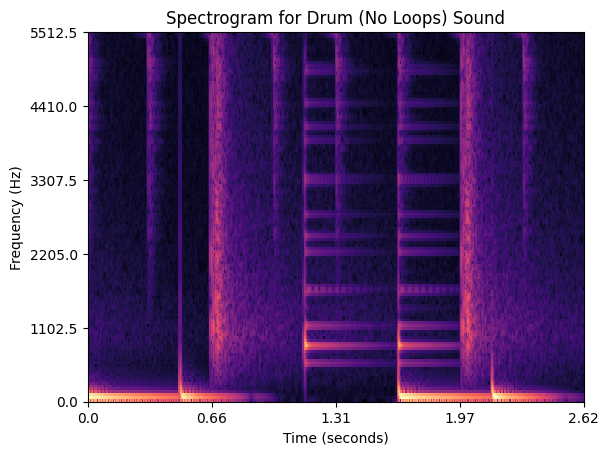

In [28]:
def stft_without_loops( input_sound, dft_size, hop_size, window):
    # YOUR CODE HERE

    # pad input_sound with zeros if necessary 
    n = len(input_sound)
    hop_remainder = (n - dft_size) % hop_size
    if hop_remainder != 0:
        input_sound = np.append(input_sound, np.zeros(hop_remainder))
        n += hop_remainder
    num_frames = ((n - dft_size) // hop_size) + 1

    # compute the indices for the frames
    slices = np.arange(dft_size)[:, np.newaxis] + np.arange(num_frames) * hop_size

    # compute DFT
    frames = input_sound[slices] * window[:, np.newaxis]
    spectrogram = np.fft.rfft(frames, axis=0)
    
    return spectrogram

# Show me an example spectrogram
drum_spectrogram2 = stft_without_loops(drum_x, dft_size, hop_size, hann_window)
utils.plot_spectrogram(drum_spectrogram2, dft_size, hop_size, drum_sr, "Drum (No Loops)", "magma")

## Part 2. The Inverse Transform

We will now implement a function that accepts the output of the function above, and returns the time-domain waveform that produces it. This is known as an inverse Short-Time Fourier Transform. This function will look as follows:

```
    waveform = istft( stft_output, dft_size, hop_size, window)
		stft_output is the 2d array produced by the function you just did in part 1.
		dft_size is the DFT point size that you will use for the resynthesis.
		hop_size is the number of samples that your synthesis frames will advance.
		window is a vector containing the synthesis window that you will be using.
```

To perform the inverse transform you need to complete the following steps.

- Take each spectrum produced by the analysis and perform an inverse DFT on it. For each spectrum you should get back a small snippet of sound that was part of the original input.

- If the hop size you used is the same as the DFT size, you can simply concatenate the waveforms from above and that could recreate the original input (if you didn’t use a window). However since the waveforms in the analysis frames are likely to overlap (which happens when the hop size is smaller than the DFT size), you will need to use an overlap-add procedure. Generate an output array which is as long as the desired output sound and set all its elements to zero. Each time you obtain a waveform frame by applying the inverse DFT on a spectrum from step 1, you will need to add the result at the indices from which the original frame input came. This will effectively superimpose parts of frames that overlap and thus not throw away any information.

- Finally you will need to add the option of a synthesis window. Some of the operations that we will be performing will result in significant changes in the time domain and might create some discontinuities at the ends of the outputs which will result in audible clicks. A good way to ensure that these artifacts go away is to use a synthesis window. This will be a function defined as before, but we will be applying it on the time-domain output of the inverse DFT.

Using the same sounds as above, verify that when you perform a forward transform and then take its inverse, that you get an output that sounds like the original (there might be minor numerical differences, you can ignore these). Try to get the resynthesized output to be as close to the input as possible, when using various settings.

Note that you can’t always get perfect reconstruction depending on the parameters you choose. The hop size needs to be equal or smaller than the DFT size otherwise you will lose information (some samples won’t be transformed). When you use a window, you also cause some information to be lost. In the case of the Hann window you should have an overlap of 1/2, 1/4, 1/8, etc. of the DFT size. If not you will get an unintended amplitude modulation. Likewise, if you use a Hann synthesis window, the hop size needs to be at most as large as 1/4 of the DFT size (try this with 1/2 the size and attempt to explain why this is a bad idea).

I suggest you start with no windowing, then use a Hann window for both synthesis and analysis. Make sure that the hop size and windows are such that the COLA principle holds (otherwise you won’t get perfect reconstruction). To ensure that the COLA principle holds you need to make sure that when you add windows which are offset by the hop size they sum to a constant value. If you also use a synthesis window in addition to an analysis window, then you need to make sure that the square of these windows sums to one (because you effectively apply them twice, once for the forward transform, and once for the resynthesis).  A sneaky way to guarantee that is to select a window, and square root its components before you apply it.  Is the window is COLA, then this operation will guarantee that if you apply it for both analysis and synthesis it will still result in a constant modulation.  An easy way to check that COLA holds is to use a constant input signal (e.g. just ones) and see if you get a constant output when you resythesize.  If you see some wobbling in the output, then you know that COLA is not holding.

In [29]:
def istft( stft_output, dft_size, hop_size, window):
    # YOUR CODE HERE

    num_frames = np.shape(stft_output)[1]
    n = dft_size + ((num_frames - 1) * hop_size) 
    output_sound = np.zeros(n)

    for i in range(num_frames):
        # compute inverse FFT for current frame
        frame_idft = np.fft.irfft(stft_output[:,i], n=dft_size)
        frame = frame_idft * np.sqrt(window)

        # add result to output_sound at correct indices
        start_idx = i * hop_size
        output_sound[start_idx : start_idx + dft_size] += frame
    
    # Return reconstructed waveform
    return output_sound

# Invert all of the spectrograms from the previous assignment
# YOUR CODE HERE
drum_reconstructed = istft(drum_spectrogram, dft_size, hop_size, hann_window)
speech_reconstructed = istft(speech_spectrogram, dft_size, hop_size, hann_window)
piano_reconstructed = istft(piano_spectrogram, dft_size, hop_size, hann_window)

# Play the sounds to make sure they are correct (look out for unwanted clicks, wobbles, etc.)
# YOUR CODE HERE
utils.sound(drum_x, rate=drum_sr, label="drum_original")
utils.sound(drum_reconstructed, rate=drum_sr, label="drum_reconstructed")
utils.sound(speech_x, rate=speech_sr, label="speech_original")
utils.sound(speech_reconstructed, rate=speech_sr, label="speech_reconstructed")
utils.sound(piano_x, rate=piano_sr, label="piano_original")
utils.sound(piano_reconstructed, rate=piano_sr, label="piano_reconstructed")

# Measure your reconstruction error using the original inputs (should be tiny)
# YOUR CODE HERE
drum_len = min(len(drum_x), len(drum_reconstructed))
speech_len = min(len(speech_x), len(speech_reconstructed))
piano_len = min(len(piano_x), len(piano_reconstructed))

# calculate mean squared errors
print("Drum error: " + str(np.mean((drum_x[:drum_len] - drum_reconstructed[:drum_len]) ** 2)))
print("Speech error: " + str(np.mean((speech_x[:speech_len] - speech_reconstructed[:speech_len]) ** 2)))
print("Piano error: " + str(np.mean((piano_x[:piano_len] - piano_reconstructed[:piano_len]) ** 2)))

# 1/2 the size is bad because the sound wobbles?

drum_original


drum_reconstructed


speech_original


speech_reconstructed


piano_original


piano_reconstructed


Drum error: 0.013904790730369885
Speech error: 0.005196885529724982
Piano error: 0.007069907720272754


Once again, optional extra credit if you do not use a for loop.

In [30]:
def istft_without_loops( stft_output, dft_size, hop_size, window):
    # YOUR CODE HERE
    num_frames = np.shape(stft_output)[1]
    n = dft_size + ((num_frames - 1) * hop_size)
    output_sound = np.zeros(n)

    # compute inverse FFT for all frames at once
    frame_idft = np.fft.irfft(stft_output, n=dft_size, axis=0)
    frames = frame_idft * np.sqrt(window)[:, None] # reshapes window to (dft_size, 1)

    # compute indices for using np.add.at to sum the frames
    indices = np.arange(dft_size)[:, None] + hop_size * np.arange(num_frames)
    np.add.at(output_sound, indices, frames)

    return output_sound

# Show me an example spectrogram, and calculate mean squared error
drum_reconstructed2 = istft_without_loops(drum_spectrogram, dft_size, hop_size, hann_window)
utils.sound(drum_reconstructed2, rate=drum_sr, label="drum_reconstructed2")
drum_len2 = min(len(drum_x), len(drum_reconstructed2))
print("Drum error 2: " + str(np.mean((drum_x[:drum_len2] - drum_reconstructed2[:drum_len2]) ** 2)))

drum_reconstructed2


Drum error 2: 0.013904790730369885


## Part 3. An Application

Just so you get an idea of how one might use these tools here is a simple example. Take one of the test sounds above and add to it a constant sinusoid with a frequency of 1kHz. When you plot the spectrogram of that sound you should be able to see the sinusoid. Using your code take the spectrogram matrix and set its values that correspond to the sinusoid to zero. Put that back to the inverse stft function and you should get a denoised version of the signal. FYI, this is not a textbook way to solve this problem (it's a little hacky), we'll cover the right way later.

noisy_drum


denoised_drum


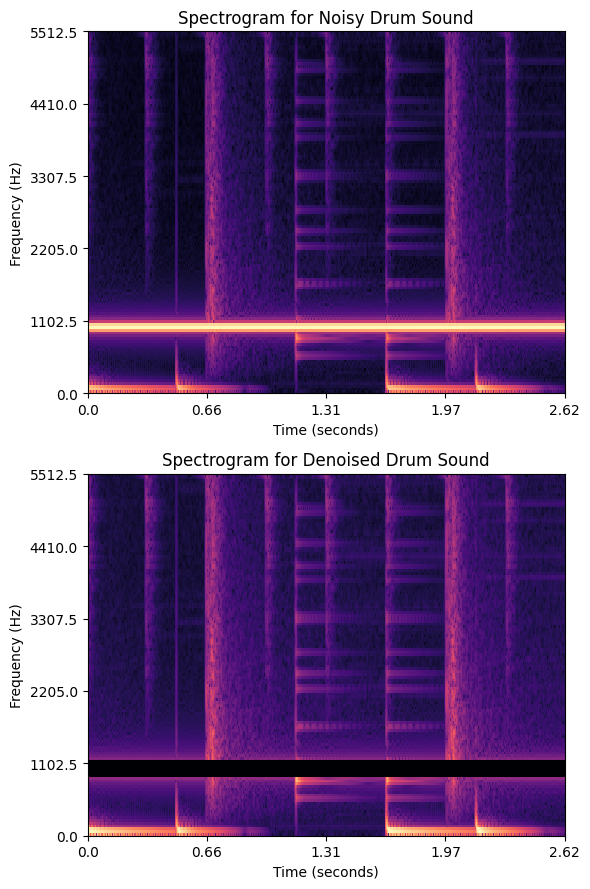

In [31]:
# Load one sound and add to it a 1kHz sinusoid of the same length
# YOUR CODE HERE
t = np.linspace(0, len(drum_x) / drum_sr, len(drum_x), dtype=np.float32)
sinusoid = np.sin(2 * np.pi * 1000 * t)
noisy_drum = drum_x + sinusoid
utils.sound(noisy_drum, rate=drum_sr, label="noisy_drum")

# Plot the spectrogram of the mix and verify that you can see both sounds
# YOUR CODE HERE
noisy_spectrogram = stft(noisy_drum, dft_size, hop_size, hann_window)

plt.figure(figsize=(6, 9))  # Set figure size
plt.subplot(2, 1, 1)
utils.plot_spectrogram(noisy_spectrogram, dft_size, hop_size, drum_sr, "Noisy Drum", "magma")

# Set selected spectrogram values to 0 to "erase" the sinusoid
# YOUR CODE HERE
sinusoid_freq = 1000
tolerance = 125

freqs = np.linspace(0, drum_sr / 2, dft_size // 2 + 1)
freq_range = np.where((freqs >= sinusoid_freq - tolerance) & (freqs <= sinusoid_freq + tolerance))
noisy_spectrogram[freq_range, :] = 0
plt.subplot(2, 1, 2)
utils.plot_spectrogram(noisy_spectrogram, dft_size, hop_size, drum_sr, "Denoised Drum", "magma")

# Use your inverse STFT routine to get a playable waveform
# YOUR CODE HERE
denoised_drum = istft(noisy_spectrogram, dft_size, hop_size, hann_window)
utils.sound(denoised_drum, rate=drum_sr, label="denoised_drum")

plt.tight_layout()
plt.show()

## Part 4: Wading into deep learning

Part 4 is optional for 3-hour credit students (but you are welcome to try to get some extra credit).  **4-hour credit students need to complete this part.**

The STFT and the ISTFT are linear operations, and they can be computed in a variety of ways.  In practice, we most often use the Fast Fourier Transform in a loop (which you likely did above), but we can also compute them using a *convolution* operation (more on this on lecture 3).  This is a useful way to see these transforms since it brings them on par with Convolutional Neural Networks and provides an easy way to transform traditional audio processing to a deep learning model.  Let's explore that relationship further.

### The STFT as a neural net

You can either use PyTorch or Jax for this part, either are awesome tools for deep learning (I usually recommend Jax since it is effectively the same as Numpy).  Either way we will use a convolution operation to compute the STFT.

To do so you need to follow the steps below:

- You need to make a convolution kernel that you will use for this operation.  Your kernel will be the *Fourier matrix* which is defined as: $F[f,t] = \frac 1 {\sqrt N} e^{-2 \pi i f t / N}$, for a size $N$ DFT and $t = 0 \cdots N$ is the time index, and $f = 0 \cdots N/2+1$ is the frequency index.

- Use this matrix as a kernel for ```torch.nn.functional.conv1d``` or ```jax.lax.conv``` functions to process a sound.  These functions are designed to work with inputs of multiple channels/batches, so you need to appropriately add dimensions to your input to make this operation work (likewise the convolution kernel needs to be changed appropriately).  You will need to figure out how to do this yourself!

Your output should be identical to the output of your previous STFT function.

In [ ]:
# STFT routine using a conv operation
def conv_stft( input, dft_size, hop_size, window):
	raise NotImplementedError()

# Show a spectrogram to verify that it does the right thing
raise NotImplementedError()

### The ISTFT as a neural net

Guess what, you can do the same for the ISTFT.  This time you will need to use a *transpose convolution* operation, either ```torch.nn.functional.conv_transpose1d``` or ```jax.lax.conv_transpose```.  The kernel will be the same Fourier matrix as above, but this time you will need to use the *Hermitian* of the matrix.  You can compute this by taking the complex conjugate of the matrix.

There is one really sneaky detail here, in order to get proper inversion you need to scale the first and last rows of the kernel by 0.5.  This is because of a computational shortcut that we take when computing the STFT of real-valued signals.

By default the convolution functions will return a complex-valued output, you can just take its real part to get the output of the ISTFT.

In [ ]:
# ISTFT routine using a conv operation
def conv_istft( stft_output, dft_size, hop_size, window):
	raise NotImplementedError()

# Compare reconstruction with input to verify that we're doing the right thing
raise NotImplementedError()